## Load package

In [1]:
library(ISLR)
library(plyr) #To use the count() to generate frequency table

## Smarket Dataset
<span style="background-color: #D3D3D3"><b>Year</b></span> The year that the observation was recorded<br>
<span style="background-color: #D3D3D3"><b>Lag1</b></span> Percentage return for previous day<br>
<span style="background-color: #D3D3D3"><b>Lag2</b></span> Percentage return for 2 days previous<br>
<span style="background-color: #D3D3D3"><b>Lag3</b></span> Percentage return for 3 days previous<br>
<span style="background-color: #D3D3D3"><b>Lag4</b></span> Percentage return for 4 days previous<br>
<span style="background-color: #D3D3D3"><b>Lag5</b></span> Percentage return for 5 days previous<br>
<span style="background-color: #D3D3D3"><b>Volume</b></span> Volume of shares traded (number of daily shares traded in billions)<br>
<span style="background-color: #D3D3D3"><b>Today</b></span> Percentage return for today<br>
<span style="background-color: #D3D3D3"><b>Direction</b></span> A factor with levels Down and Up indicating whether the market had a positive or negative return on a given day<br>

In [2]:
# Print first 10 records
head(Smarket, 10)

Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up
2001,0.213,0.614,-0.623,1.032,0.959,1.3491,1.392,Up
2001,1.392,0.213,0.614,-0.623,1.032,1.4450,-0.403,Down
2001,-0.403,1.392,0.213,0.614,-0.623,1.4078,0.027,Up
2001,0.027,-0.403,1.392,0.213,0.614,1.1640,1.303,Up
2001,1.303,0.027,-0.403,1.392,0.213,1.2326,0.287,Up


In [3]:
# Print dimension
dim(Smarket)

[1] 1250    9

## Summary Statistics of all columns

In [4]:
summary(Smarket)

      Year           Lag1                Lag2                Lag3          
 Min.   :2001   Min.   :-4.922000   Min.   :-4.922000   Min.   :-4.922000  
 1st Qu.:2002   1st Qu.:-0.639500   1st Qu.:-0.639500   1st Qu.:-0.640000  
 Median :2003   Median : 0.039000   Median : 0.039000   Median : 0.038500  
 Mean   :2003   Mean   : 0.003834   Mean   : 0.003919   Mean   : 0.001716  
 3rd Qu.:2004   3rd Qu.: 0.596750   3rd Qu.: 0.596750   3rd Qu.: 0.596750  
 Max.   :2005   Max.   : 5.733000   Max.   : 5.733000   Max.   : 5.733000  
      Lag4                Lag5              Volume           Today          
 Min.   :-4.922000   Min.   :-4.92200   Min.   :0.3561   Min.   :-4.922000  
 1st Qu.:-0.640000   1st Qu.:-0.64000   1st Qu.:1.2574   1st Qu.:-0.639500  
 Median : 0.038500   Median : 0.03850   Median :1.4229   Median : 0.038500  
 Mean   : 0.001636   Mean   : 0.00561   Mean   :1.4783   Mean   : 0.003138  
 3rd Qu.: 0.596750   3rd Qu.: 0.59700   3rd Qu.:1.6417   3rd Qu.: 0.596750  
 Max. 

## Correlation Matrix

In [5]:
# Correlation calculation cannot have non-numeric columns
# Must exclude last column "Direction
cor(Smarket[1:8])

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.00000000,0.029699649,0.030596422,0.033194581,0.035688718,0.029787995,0.53900647,0.030095229
Lag1,0.02969965,1.000000000,-0.026294328,-0.010803402,-0.002985911,-0.005674606,0.04090991,-0.026155045
Lag2,0.03059642,-0.026294328,1.000000000,-0.025896670,-0.010853533,-0.003557949,-0.04338321,-0.010250033
Lag3,0.03319458,-0.010803402,-0.025896670,1.000000000,-0.024051036,-0.018808338,-0.04182369,-0.002447647
Lag4,0.03568872,-0.002985911,-0.010853533,-0.024051036,1.000000000,-0.027083641,-0.04841425,-0.006899527
Lag5,0.02978799,-0.005674606,-0.003557949,-0.018808338,-0.027083641,1.000000000,-0.02200231,-0.034860083
Volume,0.53900647,0.040909908,-0.043383215,-0.041823686,-0.048414246,-0.022002315,1.00000000,0.014591823
Today,0.03009523,-0.026155045,-0.010250033,-0.002447647,-0.006899527,-0.034860083,0.01459182,1.000000000


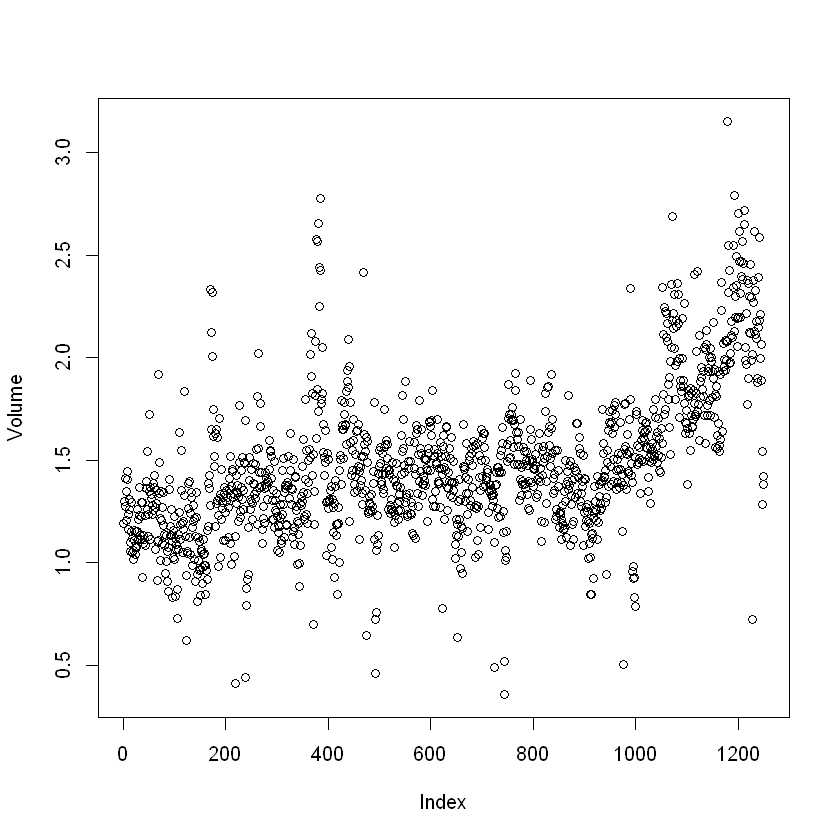

In [6]:
# It is obvious that correlation between year and volume is good (	0.53900647)
# Plot index (record order) vs Volume will see the obvious positive relationship
with(Smarket, plot(Volume))

## Create Logistics Regression model

In [7]:
# glm() is generalized linear model function
# Set family=bonomial to run logistic regression
glm_fit = glm(Direction~Lag1+Lag2+Lag3+Lag4+Lag5+Volume, data=Smarket, family=binomial)
glm_fit


Call:  glm(formula = Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + 
    Volume, family = binomial, data = Smarket)

Coefficients:
(Intercept)         Lag1         Lag2         Lag3         Lag4         Lag5  
  -0.126000    -0.073074    -0.042301     0.011085     0.009359     0.010313  
     Volume  
   0.135441  

Degrees of Freedom: 1249 Total (i.e. Null);  1243 Residual
Null Deviance:	    1731 
Residual Deviance: 1728 	AIC: 1742

In [8]:
# Summary
summary(glm_fit)


Call:
glm(formula = Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + 
    Volume, family = binomial, data = Smarket)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.446  -1.203   1.065   1.145   1.326  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)
(Intercept) -0.126000   0.240736  -0.523    0.601
Lag1        -0.073074   0.050167  -1.457    0.145
Lag2        -0.042301   0.050086  -0.845    0.398
Lag3         0.011085   0.049939   0.222    0.824
Lag4         0.009359   0.049974   0.187    0.851
Lag5         0.010313   0.049511   0.208    0.835
Volume       0.135441   0.158360   0.855    0.392

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1731.2  on 1249  degrees of freedom
Residual deviance: 1727.6  on 1243  degrees of freedom
AIC: 1741.6

Number of Fisher Scoring iterations: 3


In [9]:
# coefficient
coef(glm_fit)

(Intercept)         Lag1         Lag2         Lag3         Lag4         Lag5 
-0.126000257 -0.073073746 -0.042301344  0.011085108  0.009358938  0.010313068 
      Volume 
 0.135440659

## Create Prediction model

In [10]:
# Set type="response" for predicted probabilities
glm_probs = predict(glm_fit, type="response")
glm_probs[1:10]

1         2         3         4         5         6         7         8 
0.5070841 0.4814679 0.4811388 0.5152224 0.5107812 0.5069565 0.4926509 0.5092292 
        9        10 
0.5176135 0.4888378

## Convert probabilities into Up & Down

In [11]:
# Set to down if probablity <= 0.5
# Set to up if probablity > 0.5
glm_pred = rep("Down", 1250)
glm_pred[glm_probs > 0.5] = "Up"
count(glm_pred)

x,freq
Down,286
Up,964


## Confusion matrix

In [12]:
table(glm_pred, Smarket$Direction)

        
glm_pred Down  Up
    Down  145 141
    Up    457 507

## Correct Prediction

In [13]:
mean(glm_pred == Smarket$Direction)

[1] 0.5216

## Wrong Prediction (Also called training error rate)

In [14]:
mean(glm_pred != Smarket$Direction)

[1] 0.4784

## Create more realistics scenario, split data into training and test sets

In [15]:
# Original dataset
count(Smarket$Year)

x,freq
2001,242
2002,252
2003,252
2004,252
2005,252


In [16]:
# 2015 data for training
train = Smarket$Year < 2005
count(train)
Smarket_2015 = Smarket[!train,]
head(Smarket_2015, 10)
dim(Smarket_2015)

x,freq
FALSE,252
TRUE,998


,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
999,2005,-0.134,0.008,-0.007,0.715,-0.431,0.7869,-0.812,Down
1000,2005,-0.812,-0.134,0.008,-0.007,0.715,1.5108,-1.167,Down
1001,2005,-1.167,-0.812,-0.134,0.008,-0.007,1.7210,-0.363,Down
1002,2005,-0.363,-1.167,-0.812,-0.134,0.008,1.7389,0.351,Up
1003,2005,0.351,-0.363,-1.167,-0.812,-0.134,1.5691,-0.143,Down
1004,2005,-0.143,0.351,-0.363,-1.167,-0.812,1.4779,0.342,Up
1005,2005,0.342,-0.143,0.351,-0.363,-1.167,1.4904,-0.610,Down
1006,2005,-0.610,0.342,-0.143,0.351,-0.363,1.4888,0.398,Up
1007,2005,0.398,-0.610,0.342,-0.143,0.351,1.5621,-0.863,Down
1008,2005,-0.863,0.398,-0.610,0.342,-0.143,1.5103,0.600,Up


[1] 252   9

## Create Logistics Regression model with data before 2005

In [17]:
# glm() is generalized linear model function
# Set family=bonomial to run logistic regression
glm_fit = glm(Direction~Lag1+Lag2+Lag3+Lag4+Lag5+Volume, data=Smarket, family=binomial, subset=train)
glm_fit


Call:  glm(formula = Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + 
    Volume, family = binomial, data = Smarket, subset = train)

Coefficients:
(Intercept)         Lag1         Lag2         Lag3         Lag4         Lag5  
   0.191213    -0.054178    -0.045805     0.007200     0.006441    -0.004223  
     Volume  
  -0.116257  

Degrees of Freedom: 997 Total (i.e. Null);  991 Residual
Null Deviance:	    1383 
Residual Deviance: 1381 	AIC: 1395

## Create Prediction model, target = 2015 data

In [18]:
glm_probs = predict(glm_fit, Smarket_2015, type="response")
head(glm_probs, 10)

999      1000      1001      1002      1003      1004      1005      1006 
0.5282195 0.5156688 0.5226521 0.5138543 0.4983345 0.5010912 0.5027703 0.5095680 
     1007      1008 
0.5040112 0.5106408

## Compute Confusion matrix and correct/wrong rate

In [19]:
glm_pred = rep("Down", 252)
glm_pred[glm_probs > 0.5] = "Up"
table(glm_pred, Smarket_2015$Direction)
mean(glm_pred == Smarket_2015$Direction)
mean(glm_pred != Smarket_2015$Direction)

# The success rate is bad, just 48%, we should eliminate variables that is not helpful in prediction.
# Feature selection will be added in the future in this notebook, or in another notebook file.

        
glm_pred Down Up
    Down   77 97
    Up     34 44

[1] 0.4801587

[1] 0.5198413